In [25]:

import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Load CIFAR-10 data
transform = transforms.Compose([
	transforms.Resize((32, 32)),  # Resize the image
	 transforms.ToTensor(),  # Convert the image to a tensor
	 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the tensor
])
cifar10_train = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(cifar10_train, batch_size=len(cifar10_train), shuffle=False)


Files already downloaded and verified


Cosine similarity of the CIFAR10 dataset itself, without feature extraction

Files already downloaded and verified


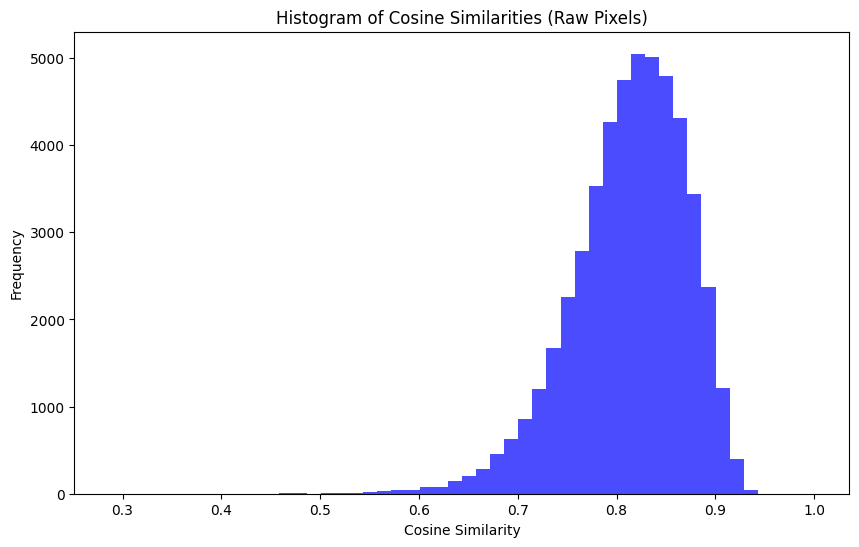

In [26]:

# Extract data into numpy arrays
data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()
images_flat = images.reshape(images.shape[0], -1)

# Compute cosine similarity of one image with all other images using raw pixels
image_index1 = 0
full_similarity_raw = cosine_similarity([images_flat[image_index1]], images_flat)

# Plotting histogram of the cosine similarities (Raw Pixels)
plt.figure(figsize=(10, 6))
plt.hist(full_similarity_raw[0], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Cosine Similarities (Raw Pixels)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()
